_Note to reader: This entire document is NOT annotated because it presents no direct relevance to the project. Feel free to get in touch for any questions regarding this particular paper!_

In [43]:
# install.packages("mice")
# install.packages("readr")
# install.packages("depmixS4")
# install.packages("VIM")
# install.packages("plotrix")

library(mice)
library(readr)
library(depmixS4)
library(VIM)
library(plotrix)

Warning message:
"package 'plotrix' was built under R version 3.6.3"

In [33]:
setwd("D://Datasets")
df <- read.table(file = "water.data", sep =",")
head(df)
dim(df)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39
D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,...,1764,?,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100


[1] 527  39

In [34]:
colnames(df) <- c("Date", "Q-E", "ZN-E", "PH-E", "DBO-E", "DQO-E", "SS-E", "SSV-E", 
"SED-E", "COND-E", "PH-P", "DBO-P", "SS-P", "SSV-P", "SED-P", "COND-P", "PH-D", "DBO-D",
"DQO-D", "SS-D", "SSV-D", "SED-D", "COND-D", "PH-S", "DBO-S", "DQO-S", "SS-S", "SSV-S", "SED-S",
"COND-S", "RD-DBO-P", "RD-SS-P", "RD-SED-P", "RD-DBO-S", "RD-DQO-S", "RD-DBO-G", "RD-DQO-G",
"RD-SS-G", "RD-SED-G")  

In [35]:
head(df)

Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,...,1764,?,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100


In [36]:
for(i in 2:39){
	df[, i] <- as.numeric(as.character(df[, i]))
	}

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, e

In [37]:
head(df)

Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
D-1/3/90,44101,1.5,7.8,NA,407,166,66.3,4.5,2110,...,2000,NA,58.8,95.5,NA,70.0,NA,79.4,87.3,99.6
D-2/3/90,39024,3.0,7.7,NA,443,214,69.2,6.5,2660,...,2590,NA,60.7,94.8,NA,80.8,NA,79.5,92.1,100.0
D-4/3/90,32229,5.0,7.6,NA,528,186,69.9,3.4,1666,...,1888,NA,58.2,95.6,NA,52.9,NA,75.8,88.7,98.5
D-5/3/90,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
D-6/3/90,36924,1.5,8.0,242,496,176,64.8,4.0,2110,...,2120,NA,62.7,95.6,NA,71.0,92.1,78.2,87.5,99.5
D-7/3/90,38572,3.0,7.8,202,372,186,68.8,4.5,1644,...,1764,NA,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100.0


In [38]:
df_orig <- df

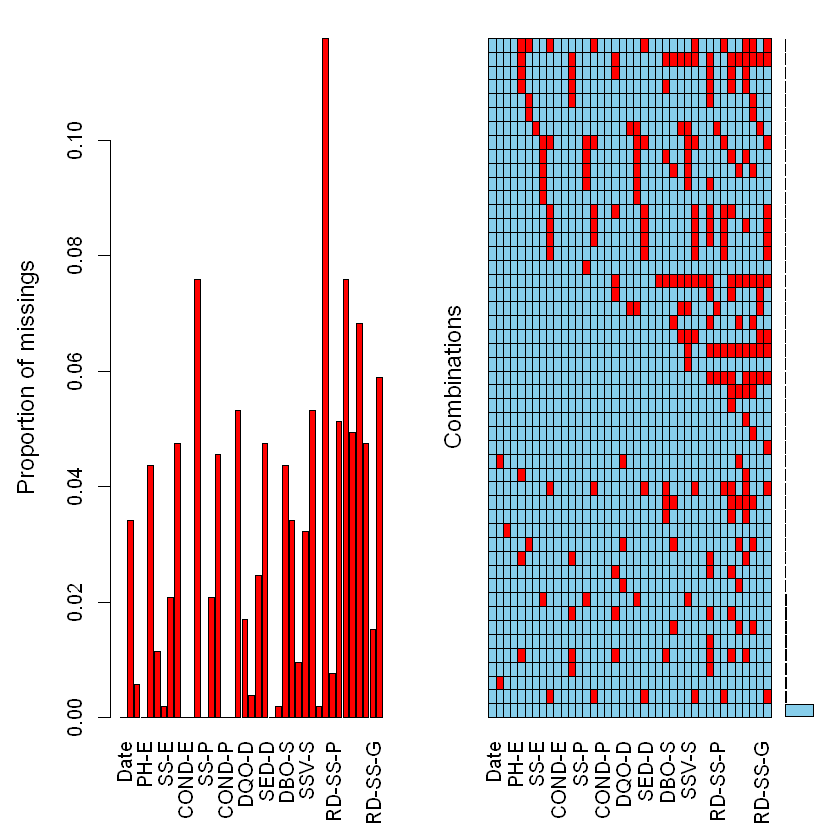

In [39]:
# png(file="MissingInWater.png")
aggr(df) # NO missingness in the Date, excellent!
	## very specific pattern?
# dev.off()

In [41]:
Miss <- function(data = df) {
	t <- vector(len = ncol(data))
	for(i in 1:ncol(data)){
		t[i] <- sum(is.na(data[,i]))
		}
	t }
t <- Miss()

print(t)

 [1]  0 18  3  0 23  6  1 11 25  0  0 40  0 11 24  0  0 28  9  2 13 25  0  1 23
[26] 18  5 17 28  1 62  4 27 40 26 36 25  8 31


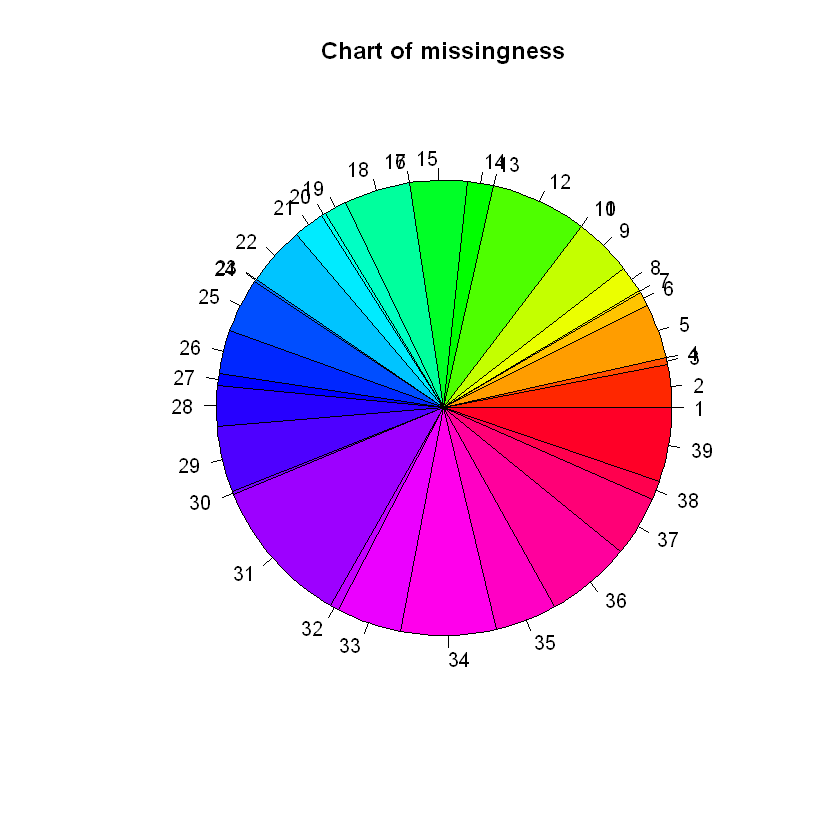

In [47]:
pie(t, col = rainbow(39), main = "Chart of missingness")

In [48]:
v<- vector()
j <- 1
for(i in 1:length(t)) {
	if(t[i]==0) {
		v[j] <- i
		j<- j+1
		}
	}

## Should be TRUE
identical(as.numeric(length(v)), as.numeric((ncol(df)-31)))
	

[1] TRUE

In [49]:
## Construct a 'clean' dataset without any of the missingness
clean <- data.frame(nrow=nrow(df))
for(j in 1:length(v)) {
	clean <- cbind(clean, df[, v[j]])
	}
clean <- clean[, -1]
colnames(clean) <- c("Date", paste("Item", c(1:(length(v)-1)), sep="_"))

In [50]:
head(clean)
dim(clean)
str(clean)

Date,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7
D-1/3/90,7.8,2110,7.9,228,2120,7.9,2010
D-2/3/90,7.7,2660,7.7,244,2570,7.6,2700
D-4/3/90,7.6,1666,7.7,220,1594,7.7,1742
D-5/3/90,7.9,2430,7.8,268,2280,7.8,2060
D-6/3/90,8.0,2110,7.9,236,2020,7.8,2250
D-7/3/90,7.8,1644,7.8,248,1762,7.7,1768


[1] 527   8

'data.frame':	527 obs. of  8 variables:
 $ Date  : Factor w/ 527 levels "D-1/1/90","D-1/1/91",..: 8 199 429 445 463 481 499 517 41 58 ...
 $ Item_1: num  7.8 7.7 7.6 7.9 8 7.8 7.8 7.7 7.7 7.8 ...
 $ Item_2: num  2110 2660 1666 2430 2110 ...
 $ Item_3: num  7.9 7.7 7.7 7.8 7.9 7.8 7.8 7.6 7.7 7.8 ...
 $ Item_4: num  228 244 220 268 236 248 320 304 220 248 ...
 $ Item_5: num  2120 2570 1594 2280 2020 ...
 $ Item_6: num  7.9 7.6 7.7 7.8 7.8 7.7 7.8 7.6 7.7 7.8 ...
 $ Item_7: num  2010 2700 1742 2060 2250 ...


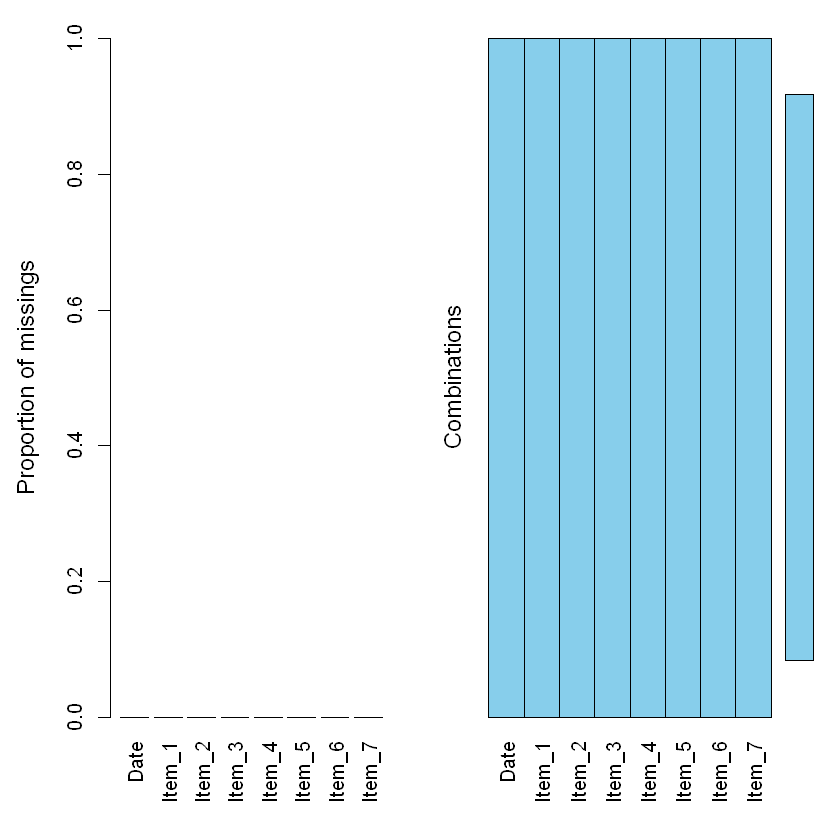

In [51]:
## Let's check we managed just fine

# png(file="CleanWater.png")
aggr(clean)
# dev.off()

In [53]:
m<- match(max(t), t)
tail(table(df[,m], useNA='always'), 10)
re<- mean(df[,m], na.rm=TRUE)
re<- round(re*100)
re<- re/100


  68 68.5 68.6   70 70.1 70.2 71.7   73 79.1 <NA> 
   1    2    1    1    1    1    1    1    1   62 

In [54]:
print(re)

[1] 39.09


In [55]:
    ## Do the same for the whole dataset
for(i in 2:39) {
	if(class(df[,i])!='integer'){
		re<- mean(df[,i], na.rm=TRUE)
		re<- round(re*100)
		re<- re/100
		df[is.na(df[,i]),i]<-re }
	}

In [56]:
head(df)

Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
D-1/3/90,44101,1.5,7.8,188.71,407,166,66.3,4.5,2110,...,2000,39.09,58.8,95.5,83.45,70.0,89.01,79.4,87.3,99.6
D-2/3/90,39024,3.0,7.7,188.71,443,214,69.2,6.5,2660,...,2590,39.09,60.7,94.8,83.45,80.8,89.01,79.5,92.1,100.0
D-4/3/90,32229,5.0,7.6,188.71,528,186,69.9,3.4,1666,...,1888,39.09,58.2,95.6,83.45,52.9,89.01,75.8,88.7,98.5
D-5/3/90,35023,3.5,7.9,205.00,588,192,65.6,4.5,2430,...,1840,33.10,64.2,95.3,87.30,72.3,90.20,82.3,89.6,100.0
D-6/3/90,36924,1.5,8.0,242.00,496,176,64.8,4.0,2110,...,2120,39.09,62.7,95.6,83.45,71.0,92.10,78.2,87.5,99.5
D-7/3/90,38572,3.0,7.8,202.00,372,186,68.8,4.5,1644,...,1764,39.09,59.7,96.5,86.70,78.3,90.10,73.1,84.9,100.0


In [68]:
identical(rep(0, times=ncol(df)), as.numeric(Miss(df)))

# Alternatively:
identical(as.integer(0), sum(Miss(df)))

[1] TRUE

[1] TRUE